<a href="https://colab.research.google.com/github/gauravmalakar08/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

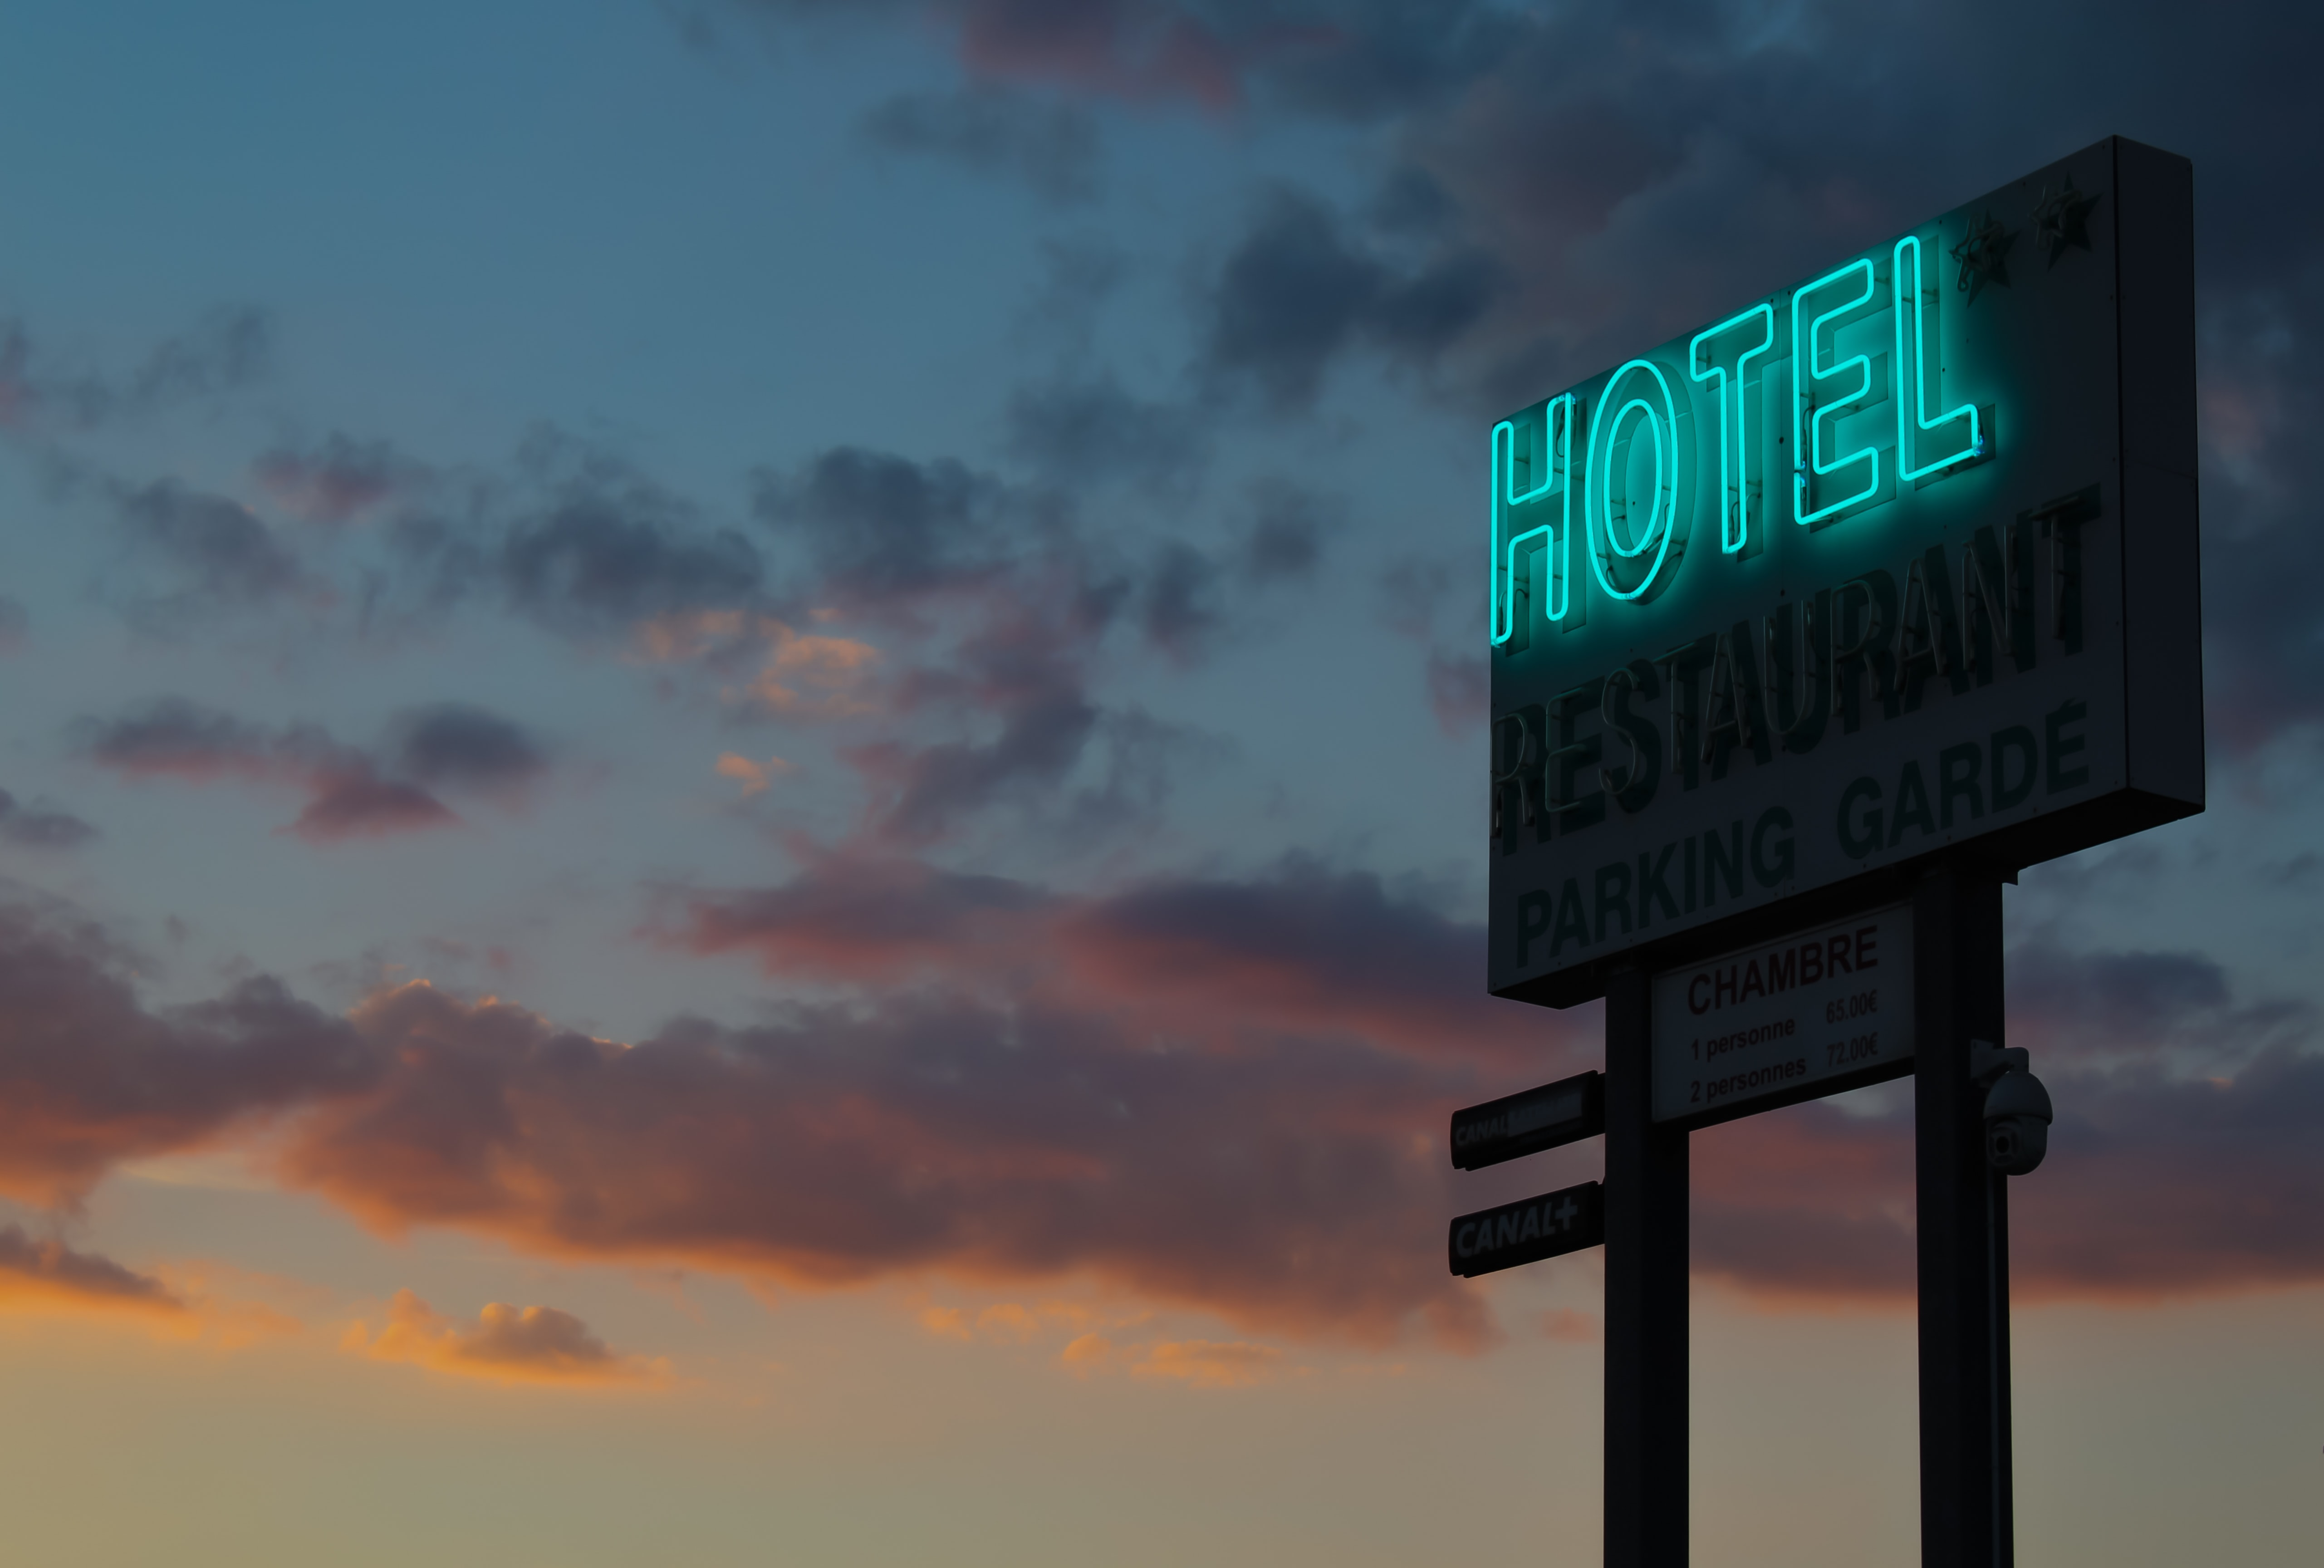

## <b> Let's explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Mounting drive to access the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Creating a variable to load the csv file from the google drive
path = ('/content/drive/MyDrive/Colab Notebooks/Capstone Projects /EDA/Hotel Bookings.csv')

In [ ]:
#reading the csv file
df = pd.read_csv(path)

In [ ]:
#Looking into the data set
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe() # checking the stats of dataset

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Creating a copy of dataframe
df1 = df.copy()

In [ ]:
df1.nunique() # identifying the number of unique values in each columns

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
#checking the unique values in columns
colm_types = list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for col in colm_types:
  print(col ,':', df1[col].unique())

reservation_status : ['Check-Out' 'Canceled' 'No-Show']
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
deposit_type : ['No Deposit' 'Refundable' 'Non Refund']
assigned_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
hotel : ['Resort Hotel' 'City Hotel']
reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
distribution_channel : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']


So the name of the columns which contains unique data which we just found out:


*   hotel (Resort Hotel, city hotel)
*   is_canceled (0,1)
*   arrival_date_year (2015, 2016, 2017)
*   meal ('BB', 'FB', 'HB', 'SC', 'Undefined')
*   is_repeated_guest (0, 1)
*   deposit_type ('No Deposit', 'Refundable', 'Non Refund')
*   customer_type ('Transient', 'Contract', 'Transient-Party', 'Group')
*   required_car_parking_spaces (0, 1, 2, 8, 3)
*   total_of_special_requests (0, 1, 3, 2, 4, 5)
*   reservation_status ('Check-Out', 'Canceled', 'No-Show')




---



---


Now lets clean up and refine the data

---



---




# Data Cleaning 🤓

In [ ]:
#Checking number of duplicate rows
df1[df1.duplicated()].shape 

(31994, 32)

In [ ]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [ ]:
df1.shape

(87396, 32)

In [ ]:
#Counting total number of Null values from columns
df1.isnull().sum().sort_values(ascending = False)[:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

######Now we will replace null values by 0 in company and agent columns. The customers might have booked directly without the need of agent and booked for personal use only hence the company feild have left blank.

In [ ]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [ ]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Now we are noticing that there are 4 instaces where there are 'NaN' values for children column. This means there weren't any children present in group of customers who made that transaction. So we will fill it with the mean values of children

We will also fill the 'country' column to 'others' 

In [ ]:
df1['country'].fillna('others', inplace = True)

In [ ]:
#Rechecking the null values
df1.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

Next up, we will drop few rows which are unnessarary for the analysis.

In [ ]:
len(df1[df1['adults'] +df1['children'] +df1['babies'] == 0])

df1.drop(df1[df1['adults'] +df1['children'] +df1['babies'] == 0].index , inplace= True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

Now have to convert the coulmns into suitable datatypes. 

In [ ]:
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type as well
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

Doing some feature engineering and adding few columns 'total_days' and 'total_people' to the df1 dataframe 

In [ ]:
# Adding a new column 'total days' 
df1['total_days'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

In [ ]:
# Also, Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

#Exploring the Data 😎


Now we need to understand the correlation between the numerical data.

We are creating another dataframe containing the numerical datas

In [ ]:
cor_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_days','total_people']]
corr_mat = cor_df1.corr()

Text(0.5, 1.0, 'Correlation Heatmap For Hotel Bookings')

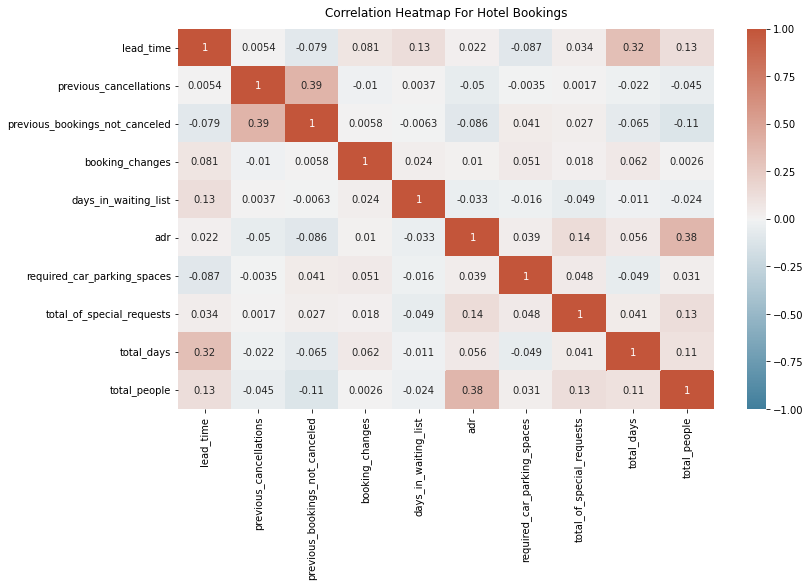

In [ ]:
#plotting a correlation heatmap using the matrix
plt.figure(figsize=(12, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(corr_mat, cmap=cmap, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap For Hotel Bookings', fontdict={'fontsize':12}, pad=12)

Observations from Correlation Matrix:


*   For longer duration of stays people generally plan little before the the actual arrival.
*   Around 13% of total people have made a special request in their booking.
*   Barely any transacrion have orrcured which led to canceletion afterwords.





We are now diving deep for the average daily revenue(adr) with the total days.

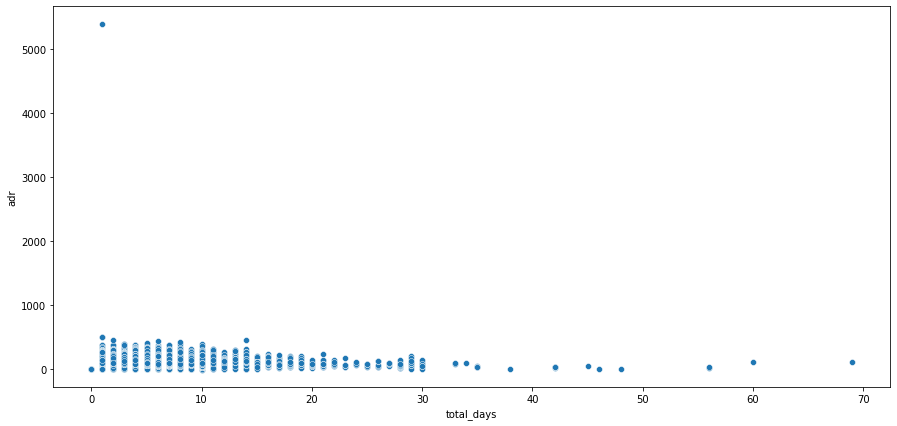

In [ ]:
#plotting a scatter graph
plt.figure(figsize = (15,7))
sns.scatterplot(y = 'adr', x = 'total_days', data = df1)
plt.show()

Bam!! We got an outliner which effects the overall graph. So we must remove this for a refined result. 

In [ ]:
#dropping the add values more than 5000
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

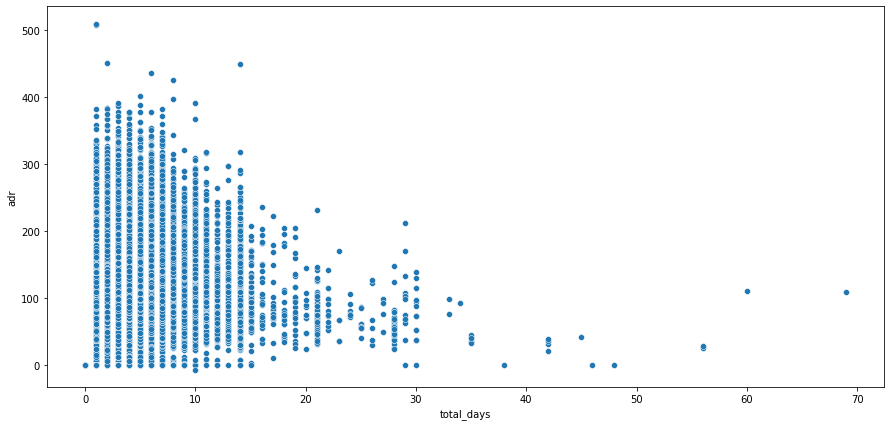

In [ ]:
plt.figure(figsize = (15,7))
sns.scatterplot(y = 'adr', x = 'total_days', data = df1)
plt.show()

Observations:


*   For the longer duration days, we are generating less profit(might have given deals or discounts to them). 
*Also, adr is inversely proportion to the total_days. 
  




Let's dig into deeper analysis and get insight from the data more precisely.

####What is percentage of bookings in each hotel?

Text(0.5, 1.0, 'Type of Hotels')

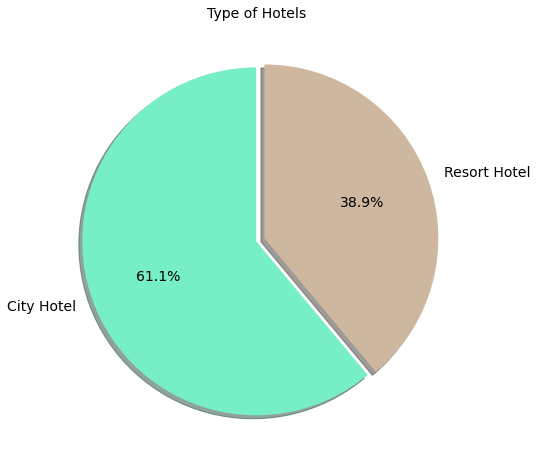

In [ ]:
plt.rcParams['figure.figsize'] = 8,8
labels = df1['hotel'].value_counts().index.tolist()
sizes = df1['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['#76EEC6','#CDB79E']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, shadow=True, textprops={'fontsize': 14})
plt.title("Type of Hotels", fontsize=14)


Observations:

*   Around 61% bookings are for City hotel and 39% bookings are for Resort hotels.

*   Resort hotels are pricer and people prefer city hotels.



####Which hotel makes more revenue?

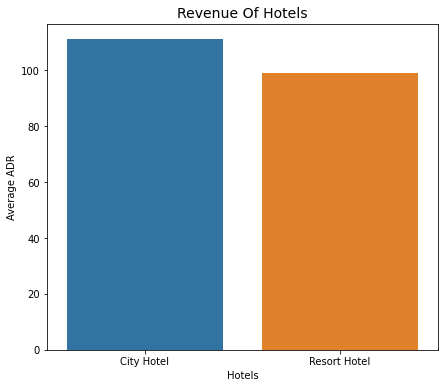

In [ ]:
groupby_hotel = df1.groupby('hotel')
rev = groupby_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'Average ADR','hotel':'Hotels'})   # calculating average adr
plt.figure(figsize = (7,6))
sns.barplot(x = rev['Hotels'], y = rev['Average ADR'])
plt.title('Revenue Of Hotels', fontsize=14)
plt.show()

Observation:


*   City Hotels are generating slighly more revenue compared to Resort hotels.



####Which hotel has maximum lead time?

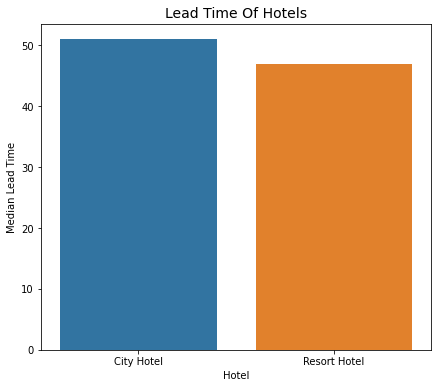

In [ ]:
lead_time = groupby_hotel['lead_time'].median().reset_index().rename(columns = {'hotel':'Hotel','lead_time':'Median Lead Time'})
plt.figure(figsize = (7,6))

sns.barplot(x = lead_time['Hotel'], y = lead_time['Median Lead Time'])
plt.title('Lead Time Of Hotels', fontsize=14)
plt.show()


Observations:


*   City Hotel has a slight more lead time than Resort hotel.
*   Customers generally plan their hotel visits way to early.



####What is preferred duration of guests in each hotel?

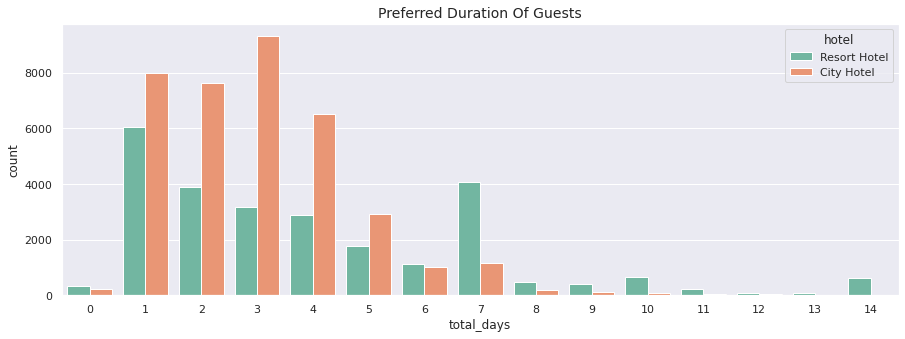

In [ ]:
#calculating the total duration of guests
not_can = df1[df1['is_canceled'] == 0]
td = not_can[not_can['total_days'] < 15]
plt.figure(figsize = (15,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= td['total_days'],hue = td['hotel'],palette="Set2")
plt.title('Preferred Duration Of Guests', fontsize=14)
plt.show()


Observations:

*   For longer stays resort hotel type is preferred and city hotels are for shorter durations.
*   It seems customers prefer to stay less than 4 days 





####What is the booking cancellation rate of each hotel?

In [ ]:
#calculating Cancelled booking 
cancelled_df = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_df.groupby('hotel')
tot_can_booking = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'Total Cancelled Bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
tot_booking= pd.DataFrame(total_booking).rename(columns = {0: 'Total Bookings'})
percent_booking = pd.concat([tot_can_booking,tot_booking], axis = 1)

# Calculating the cancel percentage 
percent_booking['Cancel Percent'] = round((percent_booking['Total Cancelled Bookings']/percent_booking['Total Bookings'])*100,2) #rounding off to 2 decimal places


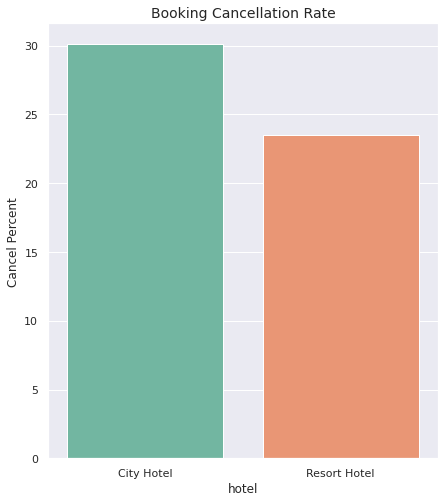

In [ ]:
plt.figure(figsize = (7,8))
sns.barplot(x = percent_booking.index, y = percent_booking['Cancel Percent'],palette="Set2")
plt.title('Booking Cancellation Rate', fontsize=14)
plt.show()

Observations:


*   Nearly 30% of the bookings for City Hotel got cancel.



####Which hotel has the longer waiting queqe for booking?

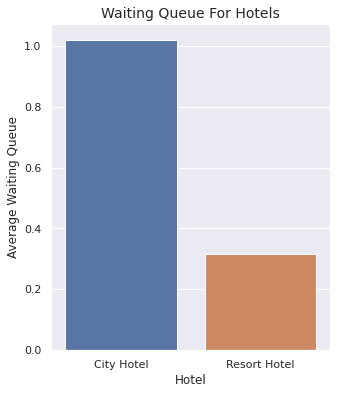

In [ ]:
tot_waiting_q = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'hotel':'Hotel','days_in_waiting_list':'Average Waiting Queue'}))
plt.figure(figsize = (5,6))
sns.barplot(x = tot_waiting_q['Hotel'], y = tot_waiting_q['Average Waiting Queue'] )
plt.title('Waiting Queue For Hotels', fontsize=14)
plt.show()

Observations:


*   The average waiting time for City Hotels is much higher than Resort hotel.
*   This is due to the fact that maximum number of customers prefer city hotels, hence it is usallly busier than Resort hotel



####Which month have the highest number of cancelations for each hotels?

In [ ]:
# Let's create a DateFrame with the relevant info
resort_bookings_per_month = df1.loc[(df1["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count() #grouping the resort bookings per month
resort_cancel_per_month = df1.loc[(df1["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()#grouping the canceled resort bookings

cty_book_per_month = df1.loc[(df1["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()#grouping the city bookings per month
cty_cancel_per_month = df1.loc[(df1["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()#grouping the canceled city bookings


resort_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(resort_bookings_per_month.index),
                                "Bookings": list(resort_bookings_per_month.values),
                                "Cancellation": list(resort_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancellation": list(cty_cancel_per_month.values)})

total_cancel_data = pd.concat([resort_cancel_data, cty_cancel_data], ignore_index=True)
total_cancel_data["Cancel Percent"] = total_cancel_data["Cancellation"] / total_cancel_data["Bookings"] * 100


In [ ]:
# ordering the data by month:
ord_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
total_cancel_data["Month"] = pd.Categorical(total_cancel_data["Month"], categories=ord_months, ordered=True)

In [ ]:
#checking the total cancel data dataframe 
total_cancel_data

,Hotel,Month,Bookings,Cancellation,Cancel Percent
0,Resort Hotel,April,2828,659,23.302687
1,Resort Hotel,August,4666,1513,32.426061
2,Resort Hotel,December,2114,398,18.826868
3,Resort Hotel,February,2492,439,17.616372
4,Resort Hotel,January,1961,274,13.972463
5,Resort Hotel,July,4313,1300,30.141433
6,Resort Hotel,June,2759,833,30.192099
7,Resort Hotel,March,2656,465,17.507530
8,Resort Hotel,May,2942,696,23.657376
9,Resort Hotel,November,2051,307,14.968308


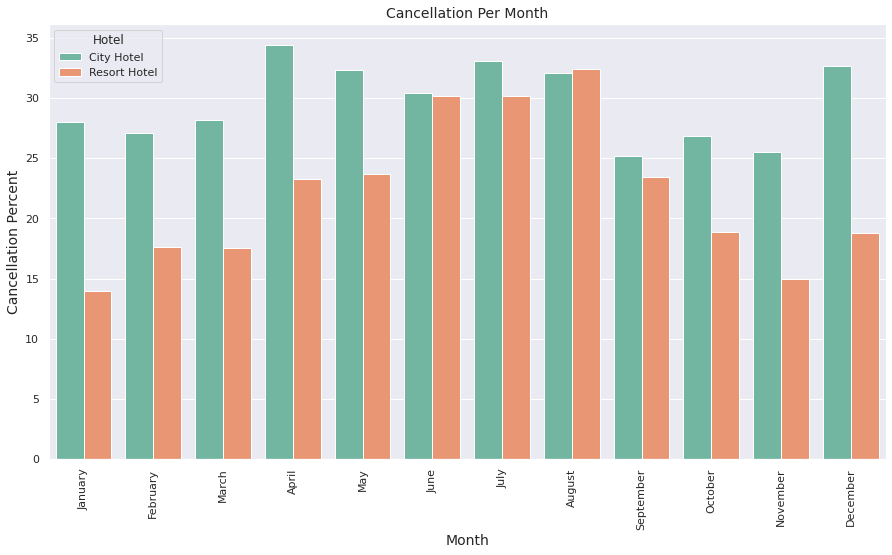

In [ ]:
#plotting the barchart
plt.figure(figsize=(15, 8))
sns.barplot(x = "Month", y = "Cancel Percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=total_cancel_data, palette="Set2")
plt.title("Cancellation Per Month", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Cancellation Percent", fontsize=14)
plt.show()


Observations:


*   We can able to find that the month of April has the highest number of cancellations followed by July and December for City Hotel
*   While month of August has the highest percent of cancellations for resort Hotels



####Which hotel has higher customer retention?

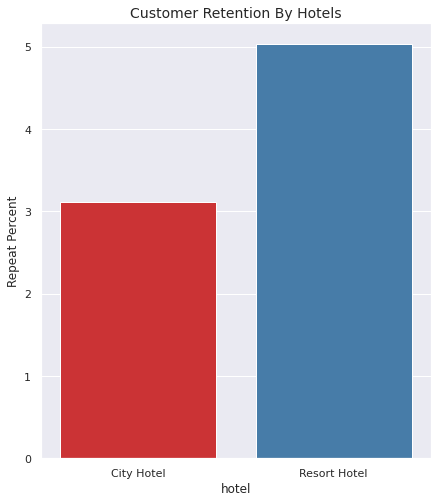

In [ ]:
# Selecting and counting repeated customers bookings
repeat_cus = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeat_cus.groupby('hotel')
d1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
group_by_hotel = df1.groupby('hotel')
tot_booking = group_by_hotel.size()
d2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
d3 = pd.concat([d1,d2], axis = 1)

# Calculating the repeat percent
d3['Repeat Percent'] = round((d3['total_repeated_guests']/d3['total_bookings'])*100,2)

plt.figure(figsize = (7,8))
sns.barplot(x = d3.index, y = d3['Repeat Percent'],palette="Set1")
plt.title('Customer Retention By Hotels', fontsize=14)
plt.show()

Observations:


*   Resort Hotel have maximum number of repeated customers over city hotels since it offer plus service and people tend to stay for longer duration




####What is the footfall of guests during each year?

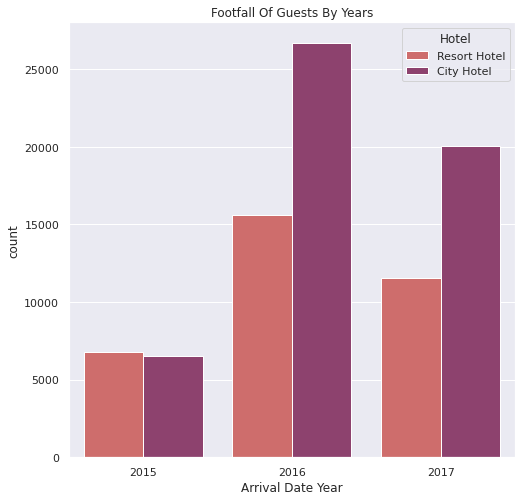

In [ ]:
ff_list = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
ff_list_yr = df1[ff_list].rename(columns={'hotel':'Hotel','arrival_date_year':'Arrival Date Year'})

sns.countplot(data = ff_list_yr, x = 'Arrival Date Year', hue = 'Hotel', palette="flare")
plt.title('Footfall Of Guests By Years')
plt.show()


Observations:


*   We can able to find that year 2016 shows the maximum number of footfall for Resort and City hotels.
*   The footfalls have dipped a bit for the next year for both hotels, could be some external factors.



####What is the footfall of guests per month?

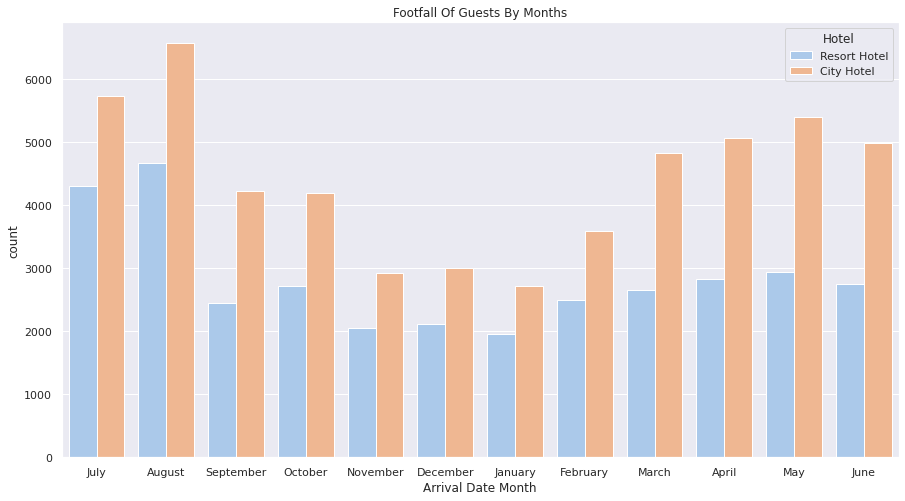

In [ ]:
ff_list_mon = df1[ff_list].rename(columns={'hotel':'Hotel','arrival_date_month':'Arrival Date Month'})

plt.figure(figsize=(15, 8))

sns.countplot(data = ff_list_mon, x = 'Arrival Date Month', hue = 'Hotel', palette='pastel')
plt.title('Footfall Of Guests By Months')
plt.show()



Observations:


*   The footfall for Resort and City hotels are maximum on the month of August followed by July, while January saw a least footfall.

* So people usally do bookings for the holiday months and the demands are high.






####What are the footfall of guests by days ?

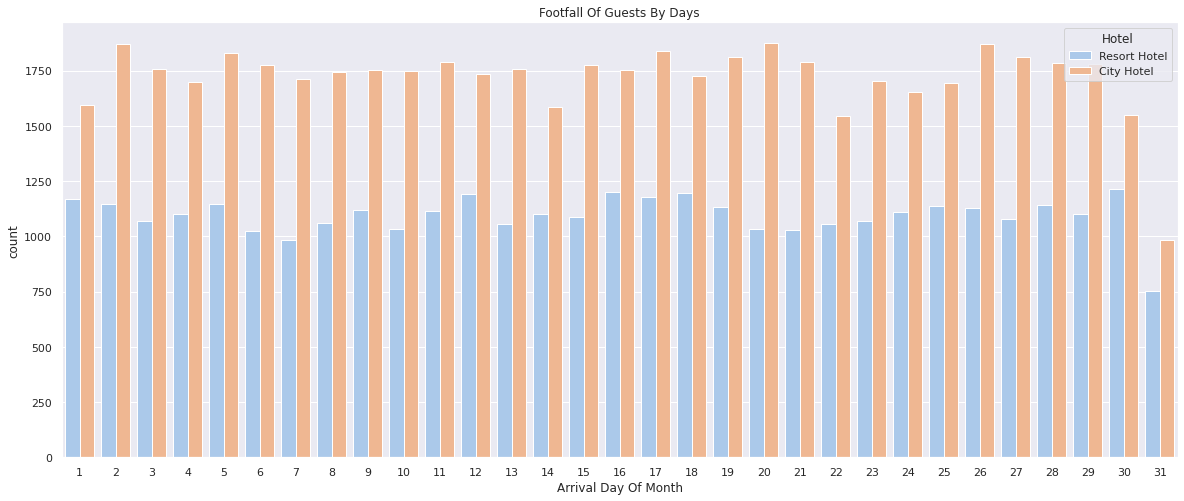

In [ ]:
ff_list_days = df1[ff_list].rename(columns={'hotel':'Hotel','arrival_date_day_of_month':'Arrival Day Of Month'})

plt.figure(figsize=(20, 8))
sns.countplot(data = ff_list_days, x = 'Arrival Day Of Month', hue = 'Hotel', palette='pastel')
plt.title('Footfall Of Guests By Days')
plt.show()


Observations:


1.   
2.   List item



####How much do guests pay for a room per night?

In [ ]:
# Counting adults and children as paying guests only, and not including babies.

rh_can = df1.loc[(df1["hotel"] == "Resort Hotel") & (df1["is_canceled"] == 0)].copy()
ch_can = df1.loc[(df1["hotel"] == "City Hotel") & (df1["is_canceled"] == 0)].copy()

rh_can['adr_pp'] = rh_can['adr'] / (rh_can['adults'] + rh_can['children'])
ch_can['adr_pp'] = ch_can['adr'] / (ch_can['adults'] + ch_can['children'])

print('''From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort Hotel: {:.2f} per night per person.
City Hotel: {:.2f} per night per person.\n'''
     .format(rh_can['adr_pp'].mean(), ch_can['adr_pp'].mean()))

df1['adr_pp'] = df1['adr'] / (df1['adults'] + df1['children'])
tot_guest_data = df1.loc[df1['is_canceled'] == 0] # only actual guests
room_prices = tot_guest_data[['hotel', 'reserved_room_type', 'adr_pp']].sort_values('adr_pp')



From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort Hotel: 48.11 per night per person.
City Hotel: 59.51 per night per person.



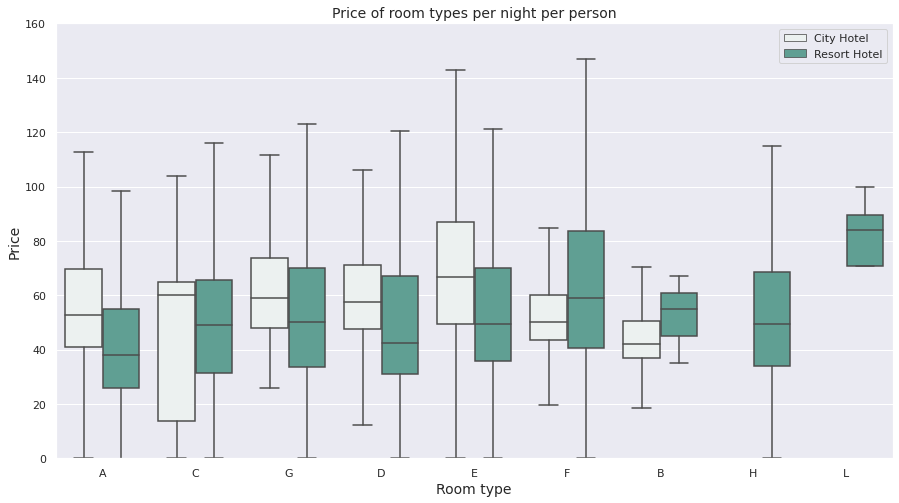

In [ ]:
#ploting the box diagram
plt.figure(figsize=(15, 8))
sns.boxplot(x='reserved_room_type',
            y='adr_pp',
            hue='hotel',
            data=room_prices, 
            hue_order=['City Hotel', 'Resort Hotel'],
            fliersize=0,palette='light:#5A9')
plt.title('Price of room types per night per person', fontsize=14)
plt.xlabel('Room type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(loc='upper right')
plt.ylim(0, 160)
plt.show()

Observations:


*   The price of room per person for City Hotel having of room type C is usually low to stay for a night while for room type E is high.
*  The L type room from Resort Hotel are the cosliest room to stay, while 



\####What is the Room Price Trend though the year?

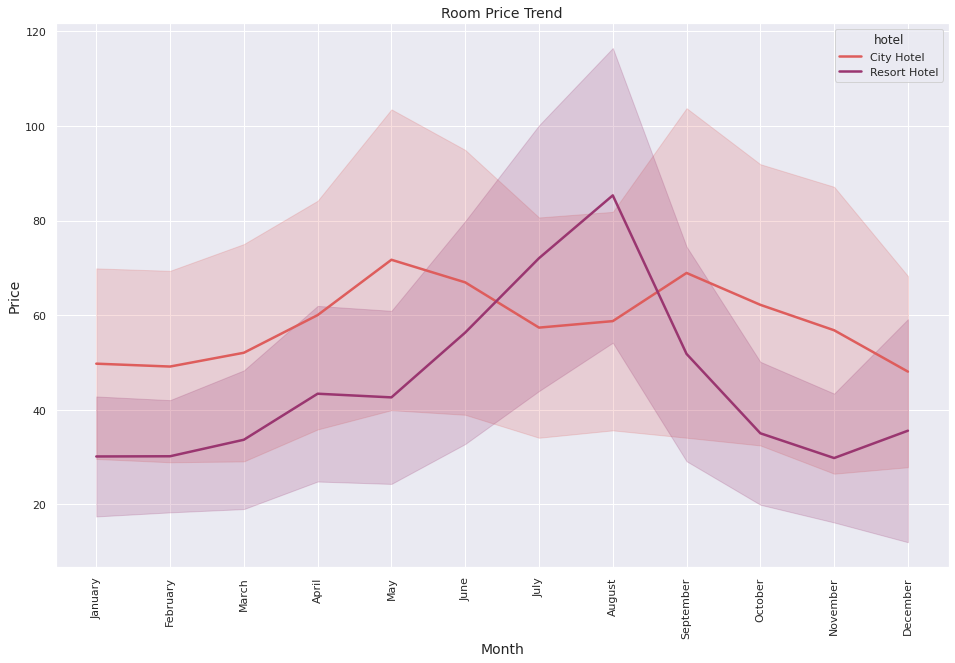

In [ ]:
#Sorting the df1 data

room_trnd = df1[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# ordering by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_trnd ["arrival_date_month"] = pd.Categorical(room_trnd ["arrival_date_month"], categories=ordered_months, ordered=True)

# Plotting the barplot with standard deviation:
plt.figure(figsize=(16, 10))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_trnd, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5),palette='flare')
plt.title("Room Price Trend", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Price", fontsize=14)
plt.show()